# Homework 2: pre-processing data

### PA Women in Tech: Intro to Data Science with Python

In this homework you will look at **pre-processing data**. You will:
* load data from a CSV
* handle missing data
* join datasets
* do some one-hot encoding

Make sure your data file is located in the same folder as this Jupyter Notebook file (or you will have to provide the full path for the file location).

## Dataset description

We will be using three datasets in the files `airlines.csv`, `airports.csv` and `flights.csv` for this homework, which contain data on airlines, airports and flights in the US.

In `airlines.csv` the columns are:
* AIRLINE_CODE
* AIRLINE

In `airports.csv` the columns are:
* AIRPORT_CODE
* AIRPORT
* CITY

In `flights.csv` the columns are:
* AIRLINE_CODE
* FLIGHT_NUMBER
* TAIL_NUMBER
* ORIGIN_AIRPORT
* DESTINATION_AIRPORT
* AIR_TIME
* DISTANCE
* CANCELLED (0 for false, 1 for true)

Firstly, the necessary packages are imported (make sure you run the cell):

In [8]:
import pandas as pd
import csv

## Load and explore the data

1a. Load each of the CSV files into a pandas DataFrame

Hint: use the keyword arguments `on_bad_lines='skip'` and `encoding='unicode_escape'`

In [9]:
df_airlines = pd.read_csv('airlines.csv', on_bad_lines='skip', encoding='unicode_escape')
df_airports = pd.read_csv('airports.csv', on_bad_lines='skip', encoding='unicode_escape')
df_flights = pd.read_csv('flights.csv', on_bad_lines='skip', encoding='unicode_escape')

1b. Display the first 5 lines of each DataFrame

In [10]:
df_airlines.head()

,AIRLINE_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [11]:
df_airports.head()

,AIRPORT_CODE,AIRPORT,CITY
0,ABE,Lehigh Valley International Airport,Allentown
1,ABI,Abilene Regional Airport,Abilene
2,ABQ,Albuquerque International Sunport,Albuquerque
3,ABR,Aberdeen Regional Airport,Aberdeen
4,ABY,Southwest Georgia Regional Airport,Albany


In [12]:
df_flights.head()

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0
1,AA,2336.0,N3KUAA,LAX,PBI,263.0,2330,0
2,US,840.0,N171US,SFO,CLT,266.0,2296,0
3,AA,258.0,N3HYAA,LAX,MIA,258.0,2342,0
4,AS,135.0,N527AS,SEA,ANC,199.0,1448,0


1c. Using a single method, conduct some quick statistical analysis on the flights data

In [13]:
df_flights.describe()

,FLIGHT_NUMBER,AIR_TIME,DISTANCE,CANCELLED
count,956.000000,858.000000,998.000000,998.000000
mean,2055.721757,128.489510,914.120240,0.084168
std,1911.587644,74.877141,600.690083,0.277779
min,9.000000,15.000000,67.000000,0.000000
25%,604.500000,69.250000,437.500000,0.000000
50%,1313.500000,119.500000,838.000000,0.000000
75%,2967.750000,164.000000,1191.500000,0.000000
max,7423.000000,390.000000,2762.000000,1.000000


## Handle missing values

2a. Check which columns have missing values in the flight data

In [14]:
df_flights.isnull().sum()

AIRLINE_CODE            49
FLIGHT_NUMBER           42
TAIL_NUMBER             54
ORIGIN_AIRPORT          92
DESTINATION_AIRPORT     60
AIR_TIME               140
DISTANCE                 0
CANCELLED                0
dtype: int64

2b. Remove all rows with missing values in columns `AIRLINE_CODE` and `FLIGHT_NUMBER`

In [15]:
df_flights.dropna(subset=['AIRLINE_CODE'])

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0
1,AA,2336.0,N3KUAA,LAX,PBI,263.0,2330,0
2,US,840.0,N171US,SFO,CLT,266.0,2296,0
3,AA,258.0,N3HYAA,LAX,MIA,258.0,2342,0
4,AS,135.0,N527AS,SEA,ANC,199.0,1448,0
...,...,...,...,...,...,...,...,...
990,WN,665.0,N684WN,DAL,STL,NaN,546,1
991,WN,323.0,N340LV,FLL,BWI,129.0,925,0
992,WN,2041.0,N8317M,MCO,LAS,285.0,2039,0
996,WN,NaN,N905WN,TPA,BWI,111.0,842,0


In [16]:
df_flights.dropna(subset=['FLIGHT_NUMBER'])

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0
1,AA,2336.0,N3KUAA,LAX,PBI,263.0,2330,0
2,US,840.0,N171US,SFO,CLT,266.0,2296,0
3,AA,258.0,N3HYAA,LAX,MIA,258.0,2342,0
4,AS,135.0,N527AS,SEA,ANC,199.0,1448,0
...,...,...,...,...,...,...,...,...
988,WN,1432.0,N346SW,CMH,TPA,114.0,829,0
989,WN,1863.0,N253WN,DAL,BWI,131.0,1209,0
990,WN,665.0,N684WN,DAL,STL,NaN,546,1
991,WN,323.0,N340LV,FLL,BWI,129.0,925,0


2c. Replace missing any missing values in the `TAIL_NUMBER`, `ORIGIN_AIRPORT` and `DESTINATION_AIRPORT` columns with the string value "UKNONWN"

In [40]:
missing_tail = df_flights['TAIL_NUMBER'].dropna().replace('np.nan', 'UNKNOWN')
df_flights['TAIL_NUMBER'] = df_flights['TAIL_NUMBER'].fillna(missing_tail)

missing_origin_airport = df_flights['ORIGIN_AIRPORT'].dropna().replace('np.nan', 'UNKNOWN')
df_flights['ORIGIN_AIRPORT'] = df_flights['ORIGIN_AIRPORT'].fillna(missing_origin_airport)

missing_destination_airport = df_flights['DESTINATION_AIRPORT'].dropna().replace('np.nan', 'UNKNOWN')
df_flights['DESTINATION_AIRPORT'] = df_flights['DESTINATION_AIRPORT'].fillna(missing_destination_airport)

2d. Replace any missing values in the `AIR_TIME` column with the average air time

In [18]:
mean_age = round(df_flights["AIR_TIME"].dropna().mean(), 0)

df_flights["AIR_TIME"] = df_flights["AIR_TIME"].fillna(mean_age)

## Join tables

3a. Join airline data on the flight data based on the `AIRLINE_CODE`, taking rows where `AIRLINE_CODE` appears in both datasets

In [19]:
df_flights.columns

Index(['AIRLINE_CODE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'AIR_TIME', 'DISTANCE', 'CANCELLED'],
      dtype='object')

In [20]:
df_airlines.columns

Index(['AIRLINE_CODE', 'AIRLINE'], dtype='object')

In [42]:
df_joined = pd.merge(df_flights, df_airlines, on=['AIRLINE_CODE'], how="left")
df_joined.head()

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED,AIRLINE
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0,Alaska Airlines Inc.
1,AA,2336.0,N3KUAA,LAX,PBI,263.0,2330,0,American Airlines Inc.
2,US,840.0,N171US,SFO,CLT,266.0,2296,0,US Airways Inc.
3,AA,258.0,N3HYAA,LAX,MIA,258.0,2342,0,American Airlines Inc.
4,AS,135.0,N527AS,SEA,ANC,199.0,1448,0,Alaska Airlines Inc.


In [41]:
df_airports.columns

Index(['AIRPORT_CODE', 'AIRPORT', 'CITY'], dtype='object')

3b. Now we want to join the dataframe with the airport data to identify which airport the flight has taken off from.

Join them using the `ORIGIN_AIRPORT` column from the merged dataframe and the `AIRPORT_CODE` from the airports dataframe.

In [44]:
flight_taken_off = pd.merge(df_joined, df_airports, left_on=['ORIGIN_AIRPORT'], right_on=['AIRPORT_CODE'])

3d. View the first five rows of your fully merged dataframe

In [23]:
flight_taken_off.head()

,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,AIR_TIME,DISTANCE,CANCELLED,AIRLINE,AIRPORT_CODE,AIRPORT,CITY
0,AS,98.0,N407AS,ANC,SEA,169.0,1448,0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage
1,AS,108.0,N309AS,ANC,SEA,173.0,1448,0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage
2,DL,1560.0,N3743H,ANC,SEA,171.0,1448,0,Delta Air Lines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage
3,AS,122.0,N413AS,ANC,PDX,187.0,1542,0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage
4,AS,136.0,N431AS,ANC,SEA,128.0,1448,1,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage


## One-hot encoding

4. One-hot encode (binarise) the `AIRLINE` column to have a separate column for each airline

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit(X_train[['race_age']])
race_age_train_encoded = encoder.transform(X_train[['race_age']])

## Standardising

5. Finally, standardise the `AIR_TIME` column

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(flight_taken_off[["AIR_TIME"]])

flight_taken_off[["AIR_TIME"]] = scaler.transform(flight_taken_off[["AIR_TIME"]])
flight_taken_off[["AIR_TIME"]]

,AIR_TIME
0,0.556411
1,0.613177
2,0.584794
3,0.811857
4,-0.025438
...,...
901,-0.025438
902,-0.025438
903,0.073902
904,-1.458774


## Extension: visualising data

Plot a bar chart showing the number of cancelled flights for each airline.

We haven't shown you how to do this - you'll need to do some Googling!

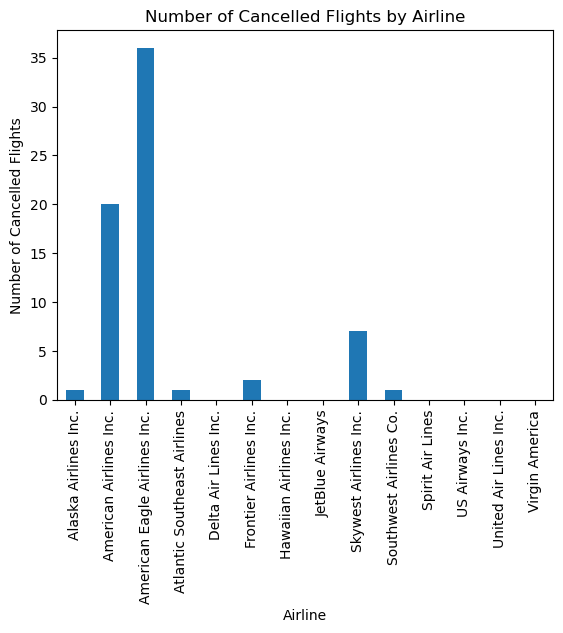

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by airline and count the number of cancelled flights
cancelled_flights = flight_taken_off.groupby('AIRLINE')['CANCELLED'].sum()

# Create a bar chart
cancelled_flights.plot(kind='bar')

# customize the chart using Matplotlib
# Set the chart title and axis labels
plt.title('Number of Cancelled Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Cancelled Flights')

# Show the chart
plt.show()